In [1]:
#This cell calls all the libraries that are used in this Notebook

# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import operator

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To try scale the data in various ways
from sklearn.preprocessing import StandardScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To check accuracy_scores and validate
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
games_df = pd.read_csv('games.csv')
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,...,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,0.739,...,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,0.774,...,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,0.955,...,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,0.933,...,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0


In [3]:
games_df.shape

(24677, 21)

In [4]:
games_df.duplicated().sum()

15

In [5]:
print(list(games_df.columns))

['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']


In [6]:
duplicate_index = games_df.duplicated(keep = False) #finding all the duplicate rows
duplicates = games_df[duplicate_index].groupby(['GAME_ID', 'HOME_TEAM_ID']) #showing all duplicate data
duplicates.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
476,2021-01-01,22000069,Final,1610612766,1610612763,2020,1610612766,93.0,0.407,0.667,...,23.0,42.0,1610612763,108.0,0.478,0.800,0.359,34.0,48.0,0
481,2021-01-01,22000074,Final,1610612750,1610612764,2020,1610612750,109.0,0.477,0.571,...,17.0,43.0,1610612764,130.0,0.551,0.762,0.485,35.0,43.0,0
492,2020-12-31,22000068,Final,1610612762,1610612756,2020,1610612762,95.0,0.417,0.684,...,16.0,46.0,1610612756,106.0,0.488,0.700,0.515,26.0,41.0,0
495,2020-12-30,22000058,Final,1610612748,1610612749,2020,1610612748,119.0,0.488,0.828,...,25.0,52.0,1610612749,108.0,0.392,0.923,0.390,26.0,47.0,1
497,2020-12-30,22000060,Final,1610612759,1610612747,2020,1610612759,107.0,0.460,0.739,...,25.0,39.0,1610612747,121.0,0.561,0.750,0.538,25.0,47.0,0
498,2020-12-30,22000061,Final,1610612746,1610612757,2020,1610612746,128.0,0.495,0.727,...,30.0,47.0,1610612757,105.0,0.421,0.853,0.316,14.0,41.0,1
507,2020-12-29,22000054,Final,1610612746,1610612750,2020,1610612746,124.0,0.534,0.875,...,32.0,46.0,1610612750,101.0,0.416,0.824,0.342,22.0,39.0,1
509,2020-12-28,22000041,Final,1610612737,1610612765,2020,1610612737,128.0,0.488,0.875,...,30.0,45.0,1610612765,120.0,0.439,0.875,0.317,24.0,48.0,1
513,2020-12-28,22000045,Final,1610612747,1610612757,2020,1610612747,107.0,0.471,0.833,...,20.0,41.0,1610612757,115.0,0.467,0.867,0.348,27.0,45.0,0
516,2020-12-27,22000033,Final,1610612764,1610612753,2020,1610612764,113.0,0.485,0.846,...,27.0,47.0,1610612753,120.0,0.435,0.974,0.360,19.0,45.0,0


In [7]:
games_df.duplicated().sum()/games_df.shape[0]*100 

0.06078534667909389

In [8]:
games_df.drop_duplicates(inplace=True)

In [9]:
games_df.isna().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [10]:
nulls = games_df[games_df.isna().any(axis=1)].groupby(['GAME_ID']) #showing all duplicate data
nulls.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
17201,2003-10-24,10300116,Final,1610612753,1610612762,2003,1610612753,NaN,NaN,NaN,...,NaN,NaN,1610612762,NaN,NaN,NaN,NaN,NaN,NaN,0
17202,2003-10-24,10300108,Final,1610612737,1610612764,2003,1610612737,NaN,NaN,NaN,...,NaN,NaN,1610612764,NaN,NaN,NaN,NaN,NaN,NaN,0
17203,2003-10-24,10300109,Final,1610612738,1610612751,2003,1610612738,NaN,NaN,NaN,...,NaN,NaN,1610612751,NaN,NaN,NaN,NaN,NaN,NaN,0
17204,2003-10-24,10300113,Final,1610612759,1610612745,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,0
17205,2003-10-24,10300112,Final,1610612749,1610612765,2003,1610612749,NaN,NaN,NaN,...,NaN,NaN,1610612765,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17295,2003-10-09,10300019,Final,1610612743,1610612756,2003,1610612743,NaN,NaN,NaN,...,NaN,NaN,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,0
17296,2003-10-09,10300022,Final,1610612757,1610612758,2003,1610612757,NaN,NaN,NaN,...,NaN,NaN,1610612758,NaN,NaN,NaN,NaN,NaN,NaN,0
17297,2003-10-08,10300013,Final,1610612759,1610612763,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612763,NaN,NaN,NaN,NaN,NaN,NaN,0
17304,2003-10-08,10300015,Final,1610612747,1610612744,2003,1610612747,NaN,NaN,NaN,...,NaN,NaN,1610612744,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
nulls['GAME_DATE_EST'].unique()

GAME_ID
10300006    [2003-10-07]
10300013    [2003-10-08]
10300015    [2003-10-08]
10300019    [2003-10-09]
10300020    [2003-10-09]
                ...     
10300112    [2003-10-24]
10300113    [2003-10-24]
10300114    [2003-10-24]
10300115    [2003-10-24]
10300116    [2003-10-24]
Name: GAME_DATE_EST, Length: 99, dtype: object

In [12]:
games_df.isna().sum()/games_df.shape[0] * 100

GAME_DATE_EST       0.000000
GAME_ID             0.000000
GAME_STATUS_TEXT    0.000000
HOME_TEAM_ID        0.000000
VISITOR_TEAM_ID     0.000000
SEASON              0.000000
TEAM_ID_home        0.000000
PTS_home            0.401427
FG_PCT_home         0.401427
FT_PCT_home         0.401427
FG3_PCT_home        0.401427
AST_home            0.401427
REB_home            0.401427
TEAM_ID_away        0.000000
PTS_away            0.401427
FG_PCT_away         0.401427
FT_PCT_away         0.401427
FG3_PCT_away        0.401427
AST_away            0.401427
REB_away            0.401427
HOME_TEAM_WINS      0.000000
dtype: float64

In [13]:
games_df = games_df.dropna(how='any',axis=0) 

In [14]:
games_df.isna().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [15]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24563 entries, 0 to 24676
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     24563 non-null  object 
 1   GAME_ID           24563 non-null  int64  
 2   GAME_STATUS_TEXT  24563 non-null  object 
 3   HOME_TEAM_ID      24563 non-null  int64  
 4   VISITOR_TEAM_ID   24563 non-null  int64  
 5   SEASON            24563 non-null  int64  
 6   TEAM_ID_home      24563 non-null  int64  
 7   PTS_home          24563 non-null  float64
 8   FG_PCT_home       24563 non-null  float64
 9   FT_PCT_home       24563 non-null  float64
 10  FG3_PCT_home      24563 non-null  float64
 11  AST_home          24563 non-null  float64
 12  REB_home          24563 non-null  float64
 13  TEAM_ID_away      24563 non-null  int64  
 14  PTS_away          24563 non-null  float64
 15  FG_PCT_away       24563 non-null  float64
 16  FT_PCT_away       24563 non-null  float6

In [61]:
games_df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.456300e+04,2.456300e+04,2.456300e+04,24563.000000,2.456300e+04,24563.000000,24563.000000,24563.000000,24563.000000,24563.000000,24563.000000,2.456300e+04,24563.000000,24563.000000,24563.000000,24563.000000,24563.000000,24563.000000,24563.000000
mean,2.169006e+07,1.610613e+09,1.610613e+09,2011.411350,1.610613e+09,102.759557,0.460246,0.759090,0.356066,22.648577,43.271425,1.610613e+09,99.899483,0.449011,0.757343,0.349425,21.294671,41.972723,0.591459
std,5.457756e+06,8.643822e+00,8.658940e+00,5.125538,8.643822e+00,13.109915,0.056714,0.100532,0.113156,5.168997,6.610277,8.658940e+00,13.245382,0.055556,0.103306,0.111334,5.125345,6.508886,0.491574
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060095e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.411000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.110094e+07,1.610613e+09,1.610613e+09,2011.000000,1.610613e+09,102.000000,0.459000,0.765000,0.357000,22.000000,43.000000,1.610613e+09,99.000000,0.448000,0.762000,0.350000,21.000000,42.000000,1.000000
75%,2.160117e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,111.000000,0.500000,0.828000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.828000,0.421000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2020.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.674000,1.000000,1.000000,46.000000,81.000000,1.000000


In [16]:
games_df['GAME_DATE_EST'] = pd.to_datetime(games_df['GAME_DATE_EST'])

In [17]:
X = games_df[['FG_PCT_home', 'FT_PCT_home', 
                'FG3_PCT_home', 'AST_home', 'REB_home', 
                'FG_PCT_away', 'FT_PCT_away', 
                'FG3_PCT_away', 'AST_away', 'REB_away']]

y = games_df[['HOME_TEAM_WINS']]

In [18]:
X.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,0.557,0.684,0.429,26.0,45.0,0.402,0.633,0.091,22.0,40.0
1,0.383,0.739,0.364,15.0,54.0,0.369,0.818,0.273,17.0,41.0
2,0.544,0.774,0.487,28.0,42.0,0.541,0.763,0.348,20.0,33.0
3,0.523,0.955,0.447,31.0,46.0,0.424,0.783,0.353,23.0,43.0
4,0.465,0.933,0.308,21.0,31.0,0.450,0.871,0.303,24.0,39.0


In [19]:
y.head()

,HOME_TEAM_WINS
0,1
1,1
2,1
3,1
4,0


In [20]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 17194 data points.
The test set has 7369 data points.


In [21]:
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on remainder set: {baseline_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.837966732581133
Accuracy on test set: 0.8427195006106663


In [22]:
# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size = 0.1, test_size=0.01, random_state=1, stratify=y_rem)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 1719 data points.
The validation set has 172 data points.


In [23]:
print('Proportions in original data:')
print(y.value_counts()/len(y), '\n')

print('Proportions in remainder set:')
print(y_rem.value_counts()/len(y_rem), '\n')

print('Proportions in test set:')
print(y_test.value_counts()/len(y_test), '\n')

print('Proportions in train set:')
print(y_train.value_counts()/len(y_train), '\n')

print('Proportions in validation set:')
print(y_val.value_counts()/len(y_val), '\n')

Proportions in original data:
HOME_TEAM_WINS
1                 0.591459
0                 0.408541
dtype: float64 

Proportions in remainder set:
HOME_TEAM_WINS
1                 0.591485
0                 0.408515
dtype: float64 

Proportions in test set:
HOME_TEAM_WINS
1                 0.591396
0                 0.408604
dtype: float64 

Proportions in train set:
HOME_TEAM_WINS
1                 0.591623
0                 0.408377
dtype: float64 

Proportions in validation set:
HOME_TEAM_WINS
1                 0.593023
0                 0.406977
dtype: float64 



In [24]:
# Let's try a modest range of C values
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Set up empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=1).fit(X_train, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_val, y_val))

In [25]:
pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies, 'Train minus Val': map(operator.sub, train_accuracies, validation_accuracies)})

,C value,train accuracy,validation accuracy,Train minus Val
0,0.00001,0.596277,0.610465,-0.014188
1,0.00010,0.755090,0.726744,0.028346
2,0.00100,0.748109,0.773256,-0.025146
3,0.10000,0.773706,0.813953,-0.040248
4,1.00000,0.808028,0.854651,-0.046623
5,10.00000,0.832461,0.866279,-0.033818
6,100.00000,0.840605,0.877907,-0.037302
7,1000.00000,0.839442,0.877907,-0.038465
8,10000.00000,0.839442,0.877907,-0.038465


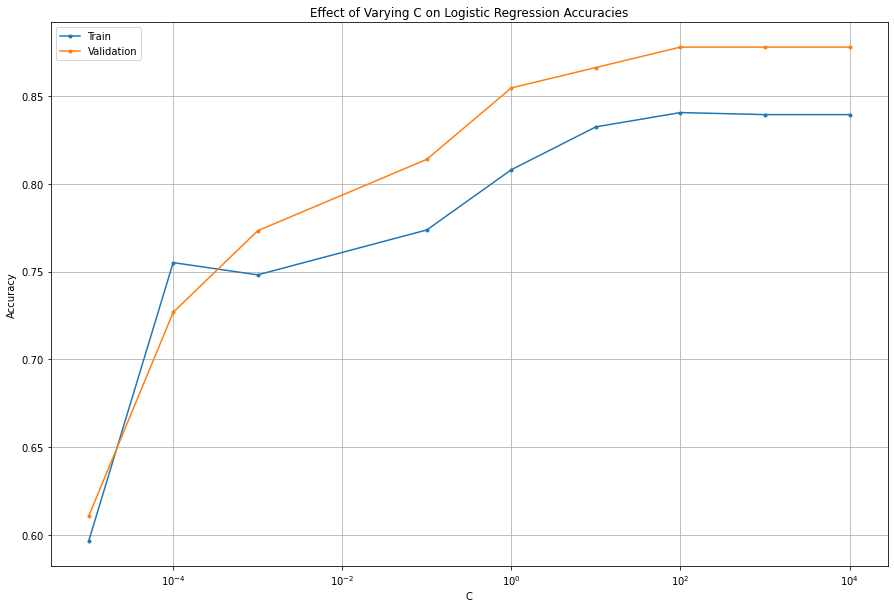

In [59]:
# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.plot(c_values, train_accuracies, label='Train', marker='.')
plt.plot(c_values, validation_accuracies, label='Validation', marker='.')
plt.legend()
plt.title('Effect of Varying C on Logistic Regression Accuracies')
plt.xscale('log') # Put the x-axis on a log scale; this is important because the C values vary in orders of magnitude
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [27]:
validated_logreg = LogisticRegression(C=10**2, random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on remainder set: {validated_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {validated_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.8402349656857043
Accuracy on test set: 0.8421766861175194


In [28]:
log_odds = validated_logreg.coef_[0]

Coefs = pd.DataFrame(log_odds, X_rem.columns, columns=['coef']).sort_values(by='coef', ascending=False)

Coefs

,coef
FG_PCT_home,25.097195
FT_PCT_home,4.285580
FG3_PCT_home,4.267937
REB_home,0.089400
AST_home,0.077689
AST_away,-0.078438
REB_away,-0.088528
FT_PCT_away,-4.024762
FG3_PCT_away,-4.216055
FG_PCT_away,-25.192151


In [29]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_rem, y_rem)

train_predictions = KNN_model.predict(X_rem) # knn will compare each test point with all the training data points
train_accuracy = accuracy_score(train_predictions, y_rem)

print(f"Train set accuracy: {train_accuracy}")
print(f"Test set accuracy: {KNN_model.score(X_test, y_test)}")

Train set accuracy: 0.8022566011399326
Test set accuracy: 0.7155652055909892


In [30]:
#create a range depending on the number of rows in our train dataset

neighbors = range(1, X_train.shape[0], 2)  

#creating list to append score values

train_acc = []
test_acc = []

for n in neighbors: 
        
    #Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train, y_train)
    
    #Find the model's prediction of X_train and X_val
    train_predictions = KNN_model.predict(X_train)
    test_predictions = KNN_model.predict(X_val)
    
    #Find the accuracies of train and val set
    train_accuracy = accuracy_score(train_predictions, y_train)
    test_accuracy = accuracy_score(test_predictions, y_val)
    
    #append accuracies to empty lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

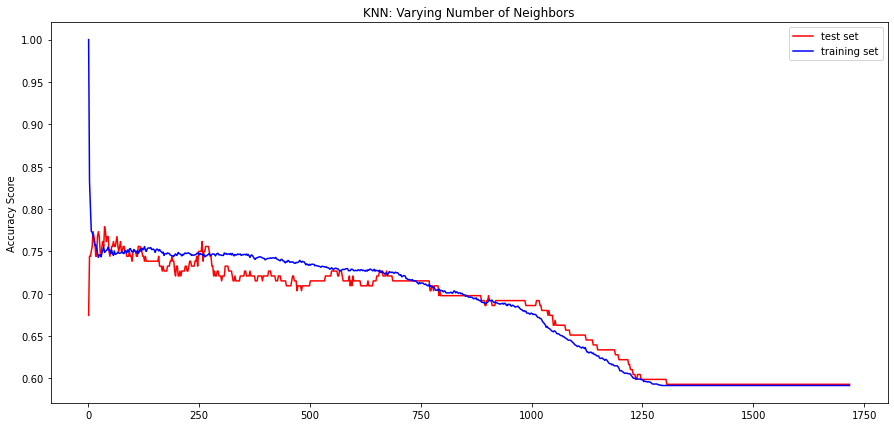

In [31]:
#changing figure size for better viewing

plt.figure(figsize=(15, 7))
plt.plot(neighbors, test_acc, color="red", label="test set") #test accuracy in red line
plt.plot(neighbors, train_acc, color="blue", label="training set") #train accuracy in blue line
plt.ylabel("Accuracy Score")
plt.title('KNN: Varying Number of Neighbors')
plt.legend()
plt.show()

In [32]:
#index the value that is largest in the test accuracy
index_of_max = np.argmax(test_acc)

#the corresponding best k value
best_k = neighbors[index_of_max]

best_k

37

In [33]:
KNN_model = KNeighborsClassifier(n_neighbors=37).fit(X_rem, y_rem)

print(f"Train set accuracy: {KNN_model.score(X_rem, y_rem)}")
print(f"Test set accuracy: {KNN_model.score(X_test, y_test)}")

Train set accuracy: 0.7549726648830988
Test set accuracy: 0.7402632650291763


In [34]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_rem, y_rem)
print(f'The train set has an accuracy of: {DT_model.score(X_rem, y_rem)}')
print(f'The validation set has an accuracy of: {DT_model.score(X_test, y_test)}')

The train set has an accuracy of: 1.0
The validation set has an accuracy of: 0.7684896186728186


In [35]:
#create empty list to store different accuracies

train_accs = []
test_accs = []
depth_values = list(range(1,15))

# Loop over different max_depths
for d in depth_values:
    
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth = d)
    my_dt.fit(X_train, y_train)
    
    # Evaluate on train & test data
    train_accs.append( my_dt.score(X_train, y_train) )
    test_accs.append( my_dt.score(X_val, y_val) )

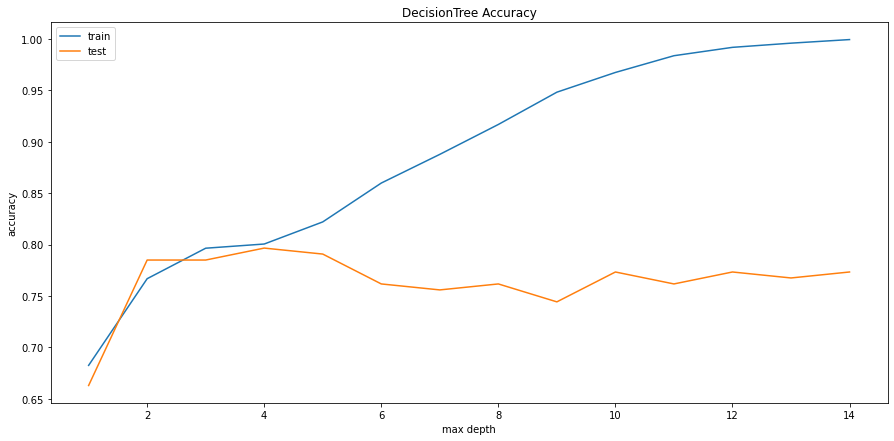

In [36]:
plt.figure(figsize=(15, 7))
plt.plot(depth_values, train_accs, label='train') #train accuracy in blue
plt.plot(depth_values, test_accs, label='test') #test accuracy in orange
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

In [37]:
DT_model = DecisionTreeClassifier(max_depth = 4).fit(X_rem, y_rem)

print(f'The train set has an accuracy of: {DT_model.score(X_rem, y_rem)}')
print(f'The validation set has an accuracy of: {DT_model.score(X_test, y_test)}')

The train set has an accuracy of: 0.7928347097824823
The validation set has an accuracy of: 0.7869453114398155


In [38]:
games_details_df = pd.read_csv('games_details.csv')
games_details_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36,14.0,...,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50,4.0,...,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,3.0,...,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,2.0,...,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07,2.0,...,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0


In [39]:
games_details_df.shape

(615626, 28)

In [40]:
print(list(games_details_df.columns))

['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']


In [92]:
gd_df = games_details_df.drop(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'], 1)

In [93]:
gd_df.head()

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST
0,Bradley Beal,0.500,0.167,0.667,4.0,3.0
1,Rui Hachimura,0.667,1.000,0.667,7.0,1.0
2,Alex Len,0.600,0.000,0.000,5.0,0.0
3,Raul Neto,0.400,0.000,0.000,3.0,1.0
4,Russell Westbrook,0.200,0.000,0.600,6.0,11.0


In [94]:
gd_df = gd_df.dropna(how='any',axis=0)

In [95]:
grouped_df = gd_df.groupby("PLAYER_NAME")


mean_df = grouped_df.mean()



mean_df = mean_df.reset_index()

In [96]:
mean_df

,PLAYER_NAME,FG_PCT,FG3_PCT,FT_PCT,REB,AST
0,A.J. Guyton,0.000000,0.000000,1.000000,2.000000,1.000000
1,AJ Hammons,0.307724,0.132172,0.129310,2.068966,0.241379
2,AJ Price,0.344166,0.258694,0.319449,1.445183,2.149502
3,Aaron Brooks,0.378718,0.307013,0.458988,1.659946,2.899194
4,Aaron Craft,0.395750,0.250000,0.000000,2.500000,1.500000
...,...,...,...,...,...,...
2350,Zion Williamson,0.620543,0.135870,0.677696,6.945652,3.141304
2351,Zoran Dragic,0.080118,0.025235,0.117647,0.529412,0.294118
2352,Zoran Planinic,0.317408,0.167065,0.282710,1.319527,1.118343
2353,Zydrunas Ilgauskas,0.465612,0.033381,0.588797,7.179126,1.094499


In [97]:
gd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515577 entries, 0 to 615625
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PLAYER_NAME  515577 non-null  object 
 1   FG_PCT       515577 non-null  float64
 2   FG3_PCT      515577 non-null  float64
 3   FT_PCT       515577 non-null  float64
 4   REB          515577 non-null  float64
 5   AST          515577 non-null  float64
dtypes: float64(5), object(1)
memory usage: 27.5+ MB


In [116]:
from sklearn.cluster import KMeans

Kmeans_model = KMeans(n_clusters=4, random_state=1)
good_col = mean_df._get_numeric_data()
Kmeans_model.fit(good_col)
labels = Kmeans_model.labels_
labels


array([1, 1, 1, ..., 1, 2, 0])

In [110]:
k_range = np.arange(1, 20)

# Instantiate an empty list of inertias
inertia_list = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(good_col)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)    


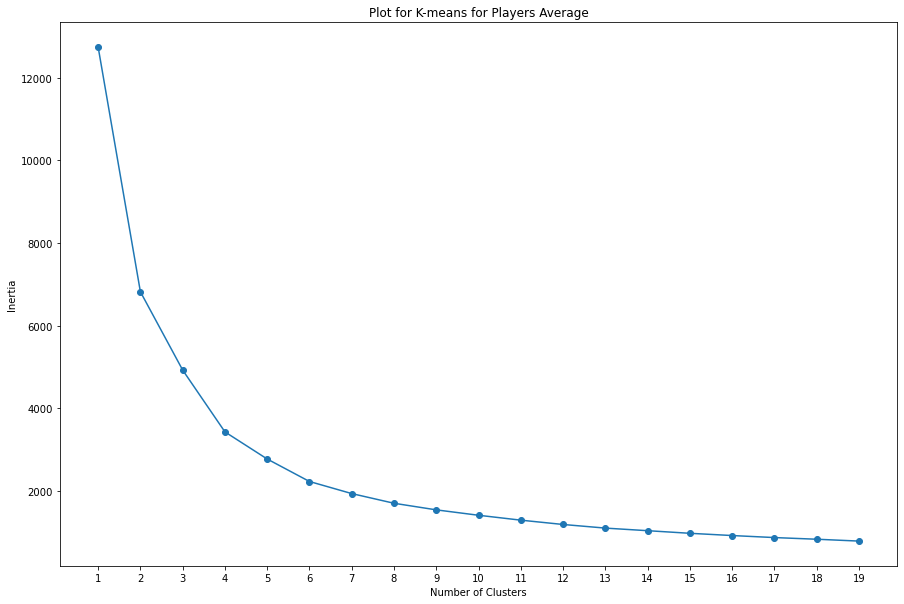

In [111]:
plt.figure(figsize=(15, 10))
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Plot for K-means for Players Average')
plt.xticks(k_range)
plt.show();

In [105]:
from sklearn.metrics import silhouette_score
k_range = np.arange(2, 20)

# Instantiate an empty list of silhouette scores
silhouette_scores = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(good_col)
    
    # Get cluster labels and calculate silhouette score
    cluster_labels = k_means_model.predict(good_col)
    silhouette = silhouette_score(good_col, cluster_labels)
    
    # Append to list
    silhouette_scores.append(silhouette)

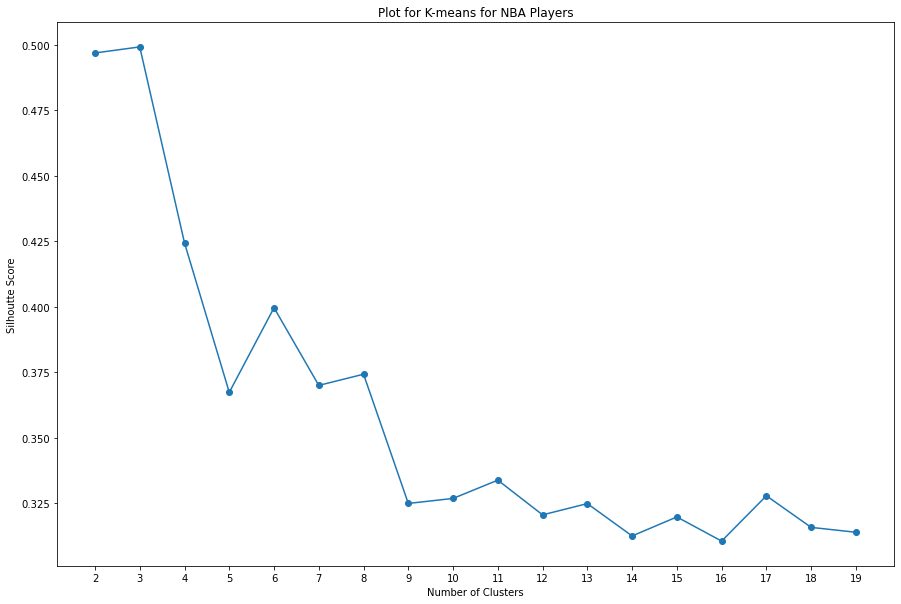

In [108]:
# plot the inertia 
plt.figure(figsize=(15, 10))
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Plot for K-means for NBA Players')
plt.xticks(k_range)
plt.show();

No handles with labels found to put in legend.


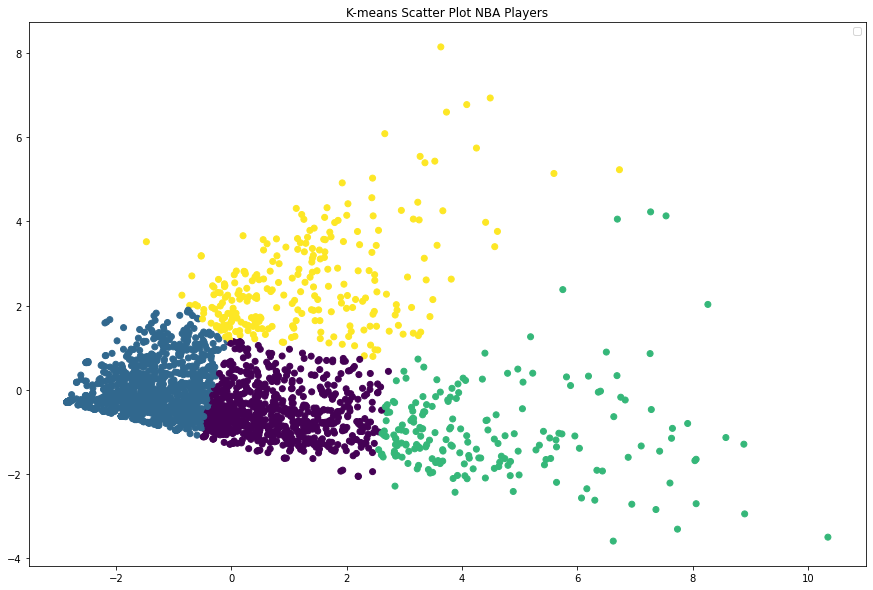

In [128]:
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_col)
plt.figure(figsize=(15, 10))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.title('K-means Scatter Plot NBA Players')
plt.legend()
plt.show()  

In [118]:
LeBron = good_col.loc[mean_df['PLAYER_NAME'] == 'LeBron James', :]
Durant = good_col.loc[mean_df['PLAYER_NAME'] == 'Kevin Durant', :]
print(LeBron)
print(Durant)

        FG_PCT   FG3_PCT    FT_PCT       REB       AST
1398  0.502906  0.300179  0.715421  7.539115  7.231656
        FG_PCT   FG3_PCT    FT_PCT       REB       AST
1300  0.498409  0.379929  0.859525  7.034039  4.072677


In [119]:
Lebron_list = LeBron.values.tolist()
durant_list = Durant.values.tolist()

Lebron_cluster = Kmeans_model.predict(Lebron_list)
durant_cluster = Kmeans_model.predict(durant_list)

print(Lebron_cluster)
print(durant_cluster)

[2]
[2]


In [41]:
players_df = pd.read_csv('players.csv')
players_df.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [42]:
players_df.shape

(7228, 4)

In [43]:
ranking_df = pd.read_csv('ranking.csv')
ranking_df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612762,0,22020,2021-05-26,West,Utah,72,52,20,0.722,31-5,21-15,NaN
1,1610612756,0,22020,2021-05-26,West,Phoenix,72,51,21,0.708,27-9,24-12,NaN
2,1610612743,0,22020,2021-05-26,West,Denver,72,47,25,0.653,25-11,22-14,NaN
3,1610612746,0,22020,2021-05-26,West,LA Clippers,72,47,25,0.653,26-10,21-15,NaN
4,1610612742,0,22020,2021-05-26,West,Dallas,72,42,30,0.583,21-15,21-15,NaN


In [44]:
ranking_df.shape

(193092, 13)

In [45]:
games_df.duplicated().sum()

0

In [46]:
games_details_df.duplicated().sum()

35

In [47]:
players_df.duplicated().sum()

0

In [48]:
ranking_df.duplicated().sum()

0

In [49]:
games_df.isna().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [50]:
games_df.isna().sum()/games_df.shape[0] * 100

GAME_DATE_EST       0.0
GAME_ID             0.0
GAME_STATUS_TEXT    0.0
HOME_TEAM_ID        0.0
VISITOR_TEAM_ID     0.0
SEASON              0.0
TEAM_ID_home        0.0
PTS_home            0.0
FG_PCT_home         0.0
FT_PCT_home         0.0
FG3_PCT_home        0.0
AST_home            0.0
REB_home            0.0
TEAM_ID_away        0.0
PTS_away            0.0
FG_PCT_away         0.0
FT_PCT_away         0.0
FG3_PCT_away        0.0
AST_away            0.0
REB_away            0.0
HOME_TEAM_WINS      0.0
dtype: float64

In [51]:
games_details_df.isna().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       379831
COMMENT              515578
MIN                  100049
FGM                  100049
FGA                  100049
FG_PCT               100049
FG3M                 100049
FG3A                 100049
FG3_PCT              100049
FTM                  100049
FTA                  100049
FT_PCT               100049
OREB                 100049
DREB                 100049
REB                  100049
AST                  100049
STL                  100049
BLK                  100049
TO                   100049
PF                   100049
PTS                  100049
PLUS_MINUS           123710
dtype: int64

In [52]:
games_details_df.isna().sum()/games_details_df.shape[0] * 100

GAME_ID               0.000000
TEAM_ID               0.000000
TEAM_ABBREVIATION     0.000000
TEAM_CITY             0.000000
PLAYER_ID             0.000000
PLAYER_NAME           0.000000
START_POSITION       61.698336
COMMENT              83.748575
MIN                  16.251588
FGM                  16.251588
FGA                  16.251588
FG_PCT               16.251588
FG3M                 16.251588
FG3A                 16.251588
FG3_PCT              16.251588
FTM                  16.251588
FTA                  16.251588
FT_PCT               16.251588
OREB                 16.251588
DREB                 16.251588
REB                  16.251588
AST                  16.251588
STL                  16.251588
BLK                  16.251588
TO                   16.251588
PF                   16.251588
PTS                  16.251588
PLUS_MINUS           20.094993
dtype: float64

In [53]:
players_df.isna().sum()

PLAYER_NAME    0
TEAM_ID        0
PLAYER_ID      0
SEASON         0
dtype: int64

In [54]:
ranking_df.isna().sum()

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     189102
dtype: int64

In [55]:
ranking_df.isna().sum()/ranking_df.shape[0] * 100

TEAM_ID           0.000000
LEAGUE_ID         0.000000
SEASON_ID         0.000000
STANDINGSDATE     0.000000
CONFERENCE        0.000000
TEAM              0.000000
G                 0.000000
W                 0.000000
L                 0.000000
W_PCT             0.000000
HOME_RECORD       0.000000
ROAD_RECORD       0.000000
RETURNTOPLAY     97.933627
dtype: float64

In [56]:
ranking_df.shape

(193092, 13)